In [28]:
import pandas as pd
import operator
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [29]:
group = np.concatenate([np.arange(939,988)])
models_test = pd.read_csv('Models_Test.csv')
models_test.head()

,Model,Type,Episode,Reward,Steps,I_C_Food,I_C_DOM,DOM_C_FOOD
0,939,train,0,-0.7,6,0,0,1
1,939,train,1,999.4,5,1,1,1
2,939,train,2,-0.8,7,1,0,1
3,939,train,3,-0.6,5,0,0,1
4,939,train,4,-0.8,7,0,0,1


In [19]:
DOM_C_FOOD = models_test[(models_test['I_C_Food']==1) & (models_test['I_C_DOM']==1)&(models_test['DOM_C_FOOD']==1)]
DOOM_N_C_FOOD = models_test[(models_test['I_C_Food']==1) & ((models_test['I_C_DOM']==0)|(models_test['DOM_C_FOOD']==0))]
DOOM_N_C_FOOD.shape[0]

84119

In [20]:
DOM_C_FOOD = models_test[(models_test['I_C_Food']==1) & (models_test['I_C_DOM']==1)&(models_test['DOM_C_FOOD']==1)]
DOOM_N_C_FOOD = models_test[(models_test['I_C_Food']==1) & (models_test['I_C_DOM']==1)&(models_test['DOM_C_FOOD']==0)]
DOOM_N_C_FOOD = models_test[(models_test['I_C_Food']==1) & ((models_test['I_C_DOM']==0)|(models_test['DOM_C_FOOD']==0))]

T= PrettyTable(['Mdl','eaten_leg','eaten_ileg','eaten_perc','Avoided_leg','Avoided_ileg','avoided_prec'])
for i in group:
    el = DOOM_N_C_FOOD[(DOOM_N_C_FOOD.Reward>0)&(DOOM_N_C_FOOD.Model==i)].shape[0]
    ai = DOOM_N_C_FOOD[(DOOM_N_C_FOOD.Reward<0)&(DOOM_N_C_FOOD.Model==i)].shape[0]
    ei = DOM_C_FOOD[(DOM_C_FOOD.Reward>0)&(DOM_C_FOOD.Model==i)].shape[0]
    al = DOM_C_FOOD[(DOM_C_FOOD.Reward<0)&(DOM_C_FOOD.Model==i)].shape[0]
    e_perc= round(el/(el+ei),3)
    a_perc = round(al/(al+ai),3)
    T.add_row([i,el,ei,e_perc,al,ai,a_perc])

In [21]:
print(T.get_string(sort_key=operator.itemgetter(0, 2), sortby="eaten_perc"))

+-----+-----------+------------+------------+-------------+--------------+--------------+
| Mdl | eaten_leg | eaten_ileg | eaten_perc | Avoided_leg | Avoided_ileg | avoided_prec |
+-----+-----------+------------+------------+-------------+--------------+--------------+
| 977 |    1380   |    2345    |    0.37    |     1392    |     234      |    0.856     |
| 978 |    1359   |    2308    |   0.371    |     1421    |     302      |    0.825     |
| 961 |    1386   |    2347    |   0.371    |     1484    |     269      |    0.847     |
| 985 |    1409   |    2368    |   0.373    |     1326    |     223      |    0.856     |
| 942 |    1438   |    2326    |   0.382    |     1466    |     274      |    0.843     |
| 964 |    1385   |    2232    |   0.383    |     1534    |     315      |     0.83     |
| 970 |    1422   |    2295    |   0.383    |     1439    |     263      |    0.845     |
| 975 |    1430   |    2299    |   0.383    |     1373    |     216      |    0.864     |
| 952 |   

In [31]:
group = np.concatenate([np.arange(911,940)])
info ={}
T= PrettyTable(['Mdl','avg tst','nm ts','Avg trn','nm tr'])

for i in group:
    x = pd.read_csv('{}/exp_details.csv'.format(i),header=None)
    tst = x[x[7]=='Test'][2]
    tr = x[x[7]=='train'][2]
    T.add_row([i,tst.mean(),tst.count(),tr.mean(),tr.count()])

print(T.get_string(sort_key=operator.itemgetter(0, 2), sortby="avg tst"))

+-----+----------------+-------+---------------+--------+
| Mdl |    avg tst     | nm ts |    Avg trn    | nm tr  |
+-----+----------------+-------+---------------+--------+
| 930 | -101.192875776 | 11117 | 86.8896315354 | 111164 |
| 923 | -99.1652447804 | 11112 | 84.3060133731 | 111119 |
| 929 | -99.1632709944 | 11122 | 87.9092216118 | 111217 |
| 916 | -98.0404339606 | 11107 |  86.895842037 | 111064 |
| 918 | -98.0043541102 | 11070 | 90.0139077095 | 110694 |
| 919 | -97.181400162  | 11113 | 87.1607515658 | 111128 |
| 925 | -97.1415859347 | 11148 | 92.8206812412 | 111473 |
| 928 | -96.8141945343 | 11124 | 91.3103644504 | 111236 |
| 936 | -96.5060274464 | 11149 | 91.4684968739 | 111481 |
| 926 | -96.4844781205 | 11152 | 92.4057712139 | 111519 |
| 933 | -96.1554695237 | 11107 |  86.219004916 | 111066 |
| 914 | -95.9789393121 | 11106 | 89.4839598772 | 111059 |
| 932 | -95.9073864148 | 11115 | 91.5315524284 | 111142 |
| 934 | -94.2487216814 | 10991 | 84.0946278435 | 109900 |
| 935 | -93.86

In [32]:
print(T.get_string(sort_key=operator.itemgetter(0, 2), sortby="Mdl"))

+-----+----------------+-------+---------------+--------+
| Mdl |    avg tst     | nm ts |    Avg trn    | nm tr  |
+-----+----------------+-------+---------------+--------+
| 911 | -70.9475541449 | 10712 | 58.3973616155 | 107111 |
| 912 | -88.0494873673 | 10924 | 77.0519388857 | 109238 |
| 913 | -92.8521699819 | 11060 | 88.1685428817 | 110595 |
| 914 | -95.9789393121 | 11106 | 89.4839598772 | 111059 |
| 915 | -85.3453063467 | 10919 | 74.7714862711 | 109186 |
| 916 | -98.0404339606 | 11107 |  86.895842037 | 111064 |
| 917 | -84.890519516  | 10991 | 82.8101344834 | 109902 |
| 918 | -98.0043541102 | 11070 | 90.0139077095 | 110694 |
| 919 | -97.181400162  | 11113 | 87.1607515658 | 111128 |
| 920 | -84.9614905695 | 10922 | 78.0676283959 | 109213 |
| 921 | -87.8160888161 | 10989 | 81.8514388162 | 109882 |
| 922 | -91.8513148283 | 10952 | 77.1337993444 | 109511 |
| 923 | -99.1652447804 | 11112 | 84.3060133731 | 111119 |
| 924 | -80.5612286002 | 10923 | 76.6582696269 | 109225 |
| 925 | -97.14

In [30]:
info ={}
T= PrettyTable(['Mdl','avg tst','nm ts','Avg trn','nm tr'])

for i in group:
    x = pd.read_csv('{}/exp_details.csv'.format(i),header=None)
    tst = x[x[7]=='Test'][2]
    tr = x[x[7]=='train'][2]
    T.add_row([i,tst.mean(),tst.count(),tr.mean(),tr.count()])

print(T.get_string(sort_key=operator.itemgetter(0, 2), sortby="avg tst"))

+-----+---------------+-------+---------------+--------+
| Mdl |    avg tst    | nm ts |    Avg trn    | nm tr  |
+-----+---------------+-------+---------------+--------+
| 939 | 350.743470818 | 12268 |  320.30047199 | 122672 |
| 955 |  375.97462039 | 12447 | 346.132892496 | 124460 |
| 948 | 378.169643713 | 12518 | 356.950668264 | 125175 |
| 944 | 378.254988086 | 12590 | 354.522055857 | 125894 |
| 947 | 381.107142288 | 12559 | 352.585139708 | 125583 |
| 959 | 382.106553726 | 12573 | 359.289718831 | 125725 |
| 943 | 382.613333866 | 12517 | 351.629475164 | 125163 |
| 949 | 382.677939654 | 12561 |  356.99465379 | 125603 |
| 958 | 384.745121272 | 12575 | 350.682313834 | 125748 |
| 951 | 387.108070259 | 12639 | 364.398798946 | 126389 |
| 972 | 387.338269736 | 12553 | 356.582144365 | 125529 |
| 941 | 388.080189279 | 12574 | 359.771421413 | 125734 |
| 957 | 388.134470691 | 12573 | 362.407532492 | 125722 |
| 962 | 389.464473369 | 12523 |  359.31400575 | 125220 |
| 979 | 392.026620646 | 12603 |

In [14]:
def calculate_mean_window(c,vector):
    if vector.shape[0]%c !=0:
        rem = vector.shape[0]%c
        needed = c-rem
        needed = np.zeros(c-rem)
        vector = np.concatenate([vector,needed])
    vector = np.reshape(vector,(c,-1))
    vector = np.mean(vector,axis=0)
    return vector

In [ ]:
plt.figure(figsize=(16,7))
for i,v in enumerate(group):
    c=500

    x = pd.read_csv('{}/exp_details.csv'.format(v),header=None)
    tr = x[x[7]=='train'][8]
    plt.plot(calculate_mean_window(c,tr),c='b')
    plt.subplot(28,2,i*2+2)
    tst = x[x[7]=='Test'][8]
    plt.plot(calculate_mean_window(c//10,tst),c='g')
plt.tight_layout()

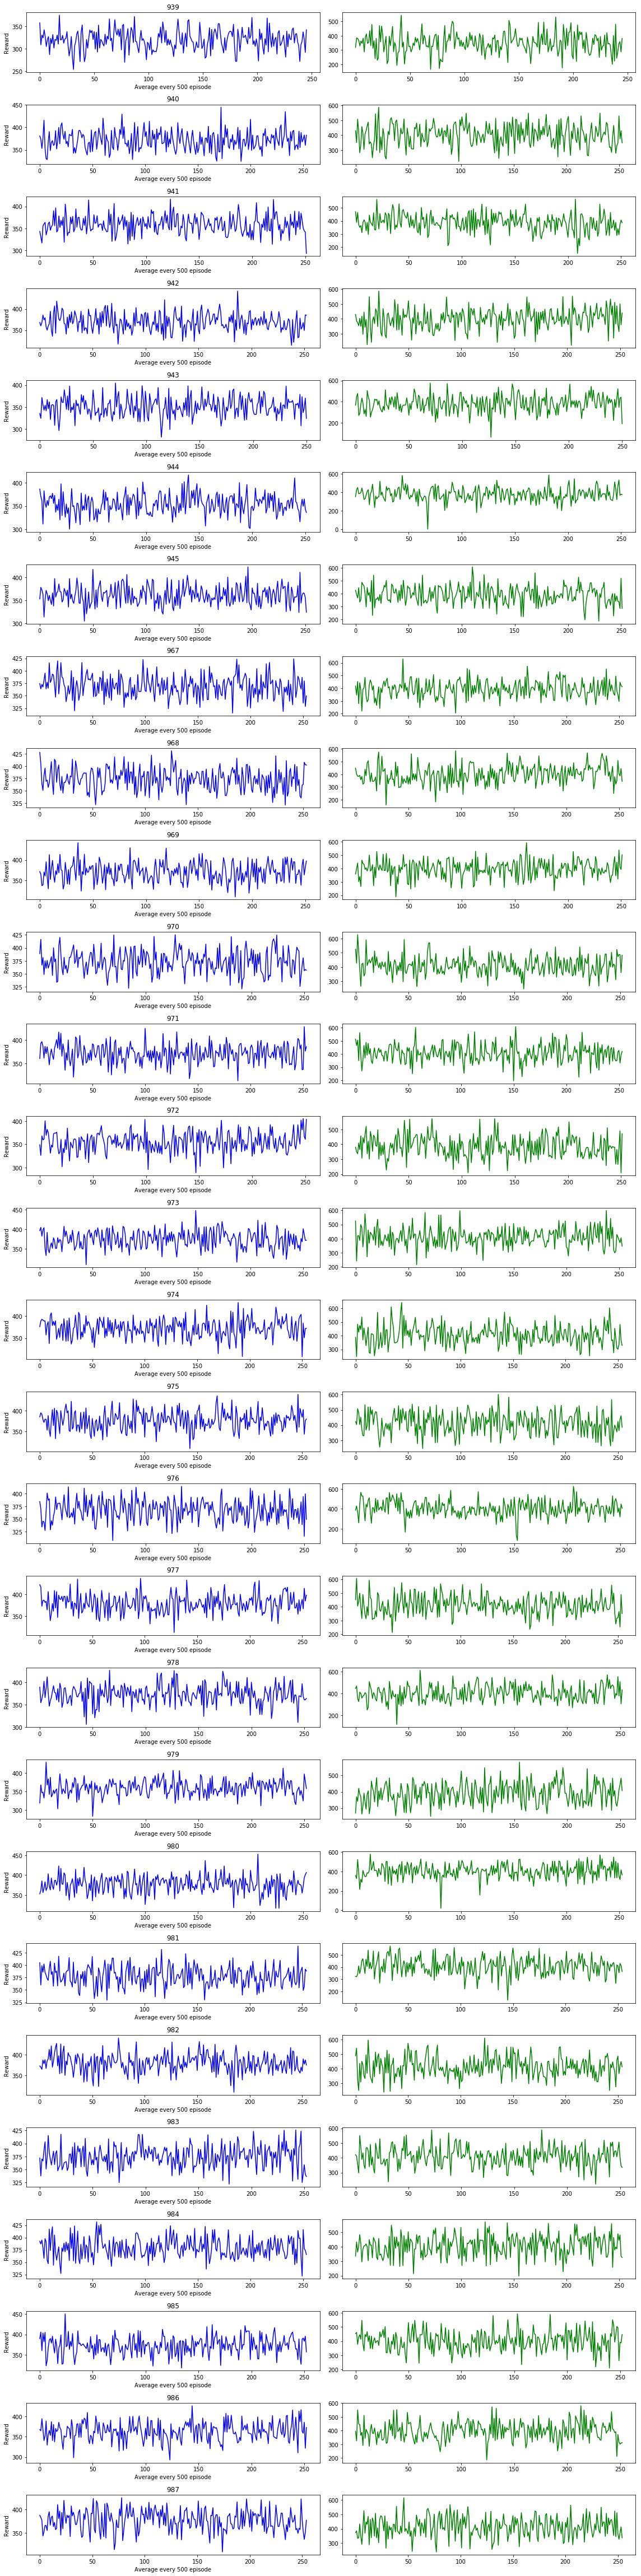

In [21]:
plt.figure(figsize=(16,64))
for i,v in enumerate(group):
    c=500
    plt.subplot(28,2,i*2+1)
    plt.title(v)
    plt.xlabel('Average every {} episode'.format(c))
    plt.ylabel('Reward')
    x = pd.read_csv('{}/exp_details.csv'.format(v),header=None)
    tr = x[x[7]=='train'][2]
    plt.plot(calculate_mean_window(c,tr),c='b')
    plt.subplot(28,2,i*2+2)
    tst = x[x[7]=='Test'][2]
    plt.plot(calculate_mean_window(c//10,tst),c='g')
plt.tight_layout()

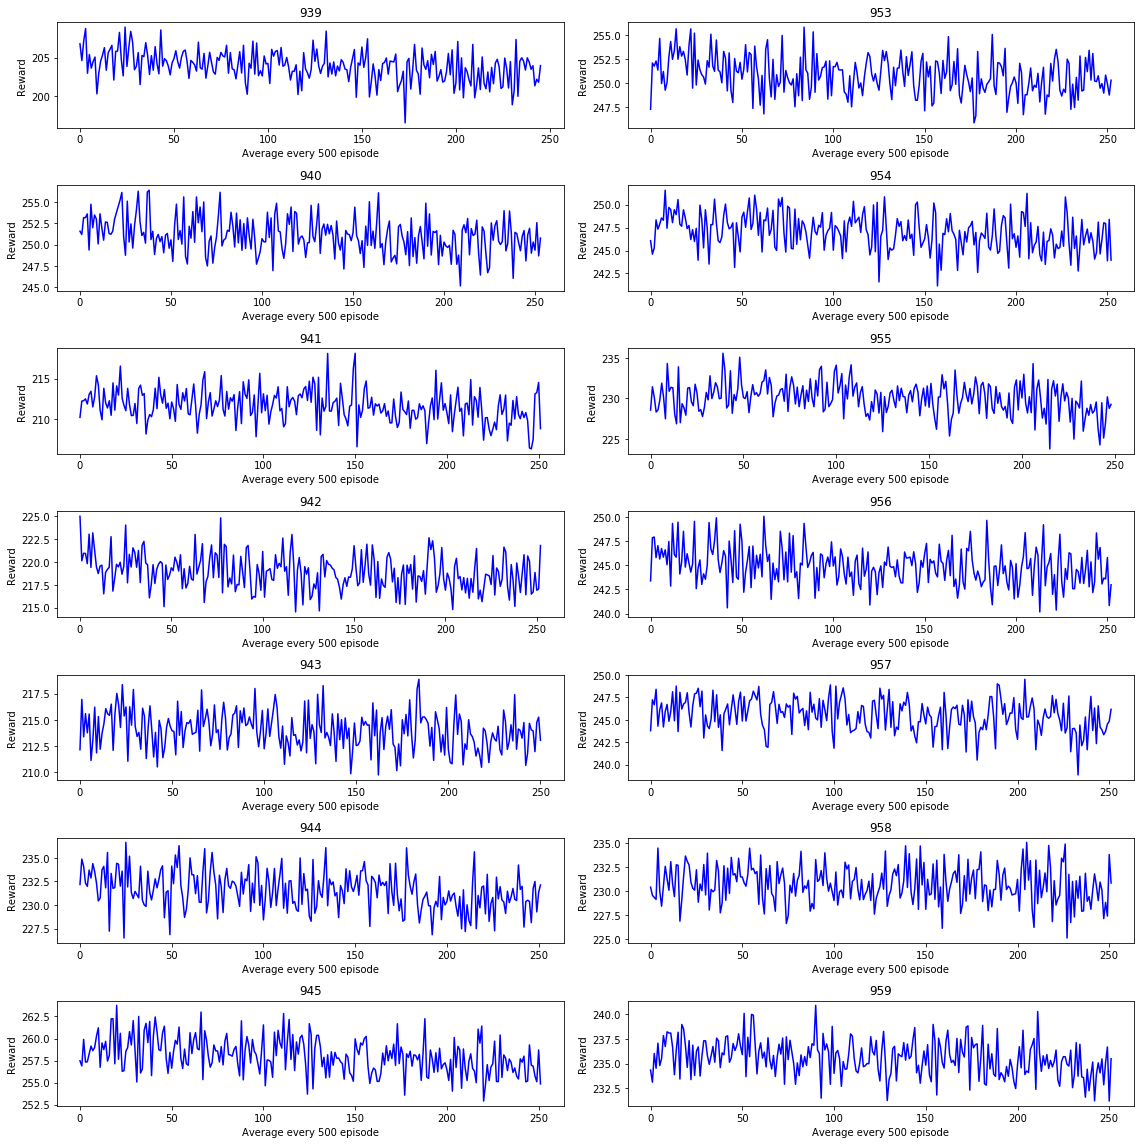

In [11]:
plt.figure(figsize=(16,16))
for i,v in enumerate(range(939,939+7)):
    c=500
    plt.subplot(7,2,i*2+1)
    plt.title(v)
    plt.xlabel('Average every {} episode'.format(c))
    plt.ylabel('Q values')
    x = pd.read_csv('{}/exp_details.csv'.format(v),header=None)
    tr = x[x[7]=='train'][8]
    plt.plot(calculate_mean_window(c,tr),c='b')
    
    plt.subplot(7,2,i*2+2)
    plt.title(v+14)
    plt.xlabel('Average every {} episode'.format(c))
    plt.ylabel('Reward')
    x = pd.read_csv('{}/exp_details.csv'.format(v+14),header=None)
    tr = x[x[7]=='train'][8]
    plt.plot(calculate_mean_window(c,tr),c='b')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(16,16))
for i,v in enumerate(range(946,946+7)):
    c=500
    plt.subplot(7,2,i*2+1)
    plt.title(v)
    plt.xlabel('Average every {} episode'.format(c))
    plt.ylabel('Reward')
    x = pd.read_csv('{}/exp_details.csv'.format(v),header=None)
    tr = x[x[7]=='train'][2]
    plt.plot(calculate_mean_window(c,tr),c='b')
    plt.subplot(7,2,i*2+2)
    tst = x[x[7]=='Test'][2]
    plt.plot(calculate_mean_window(c//10,tst),c='g')
plt.tight_layout()

## Model Analysis

In [9]:
from keras.layers import Input,Dense,Lambda,concatenate
from keras.models import load_model,Model
import numpy as np

Using Theano backend.


In [14]:
RL_mod = load_model('982/MOD/model.h5')

In [15]:
RL_mod.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 633)          0                                            
__________________________________________________________________________________________________
SL_L (Dense)                    (None, 100)          63400       input_1[0][0]                    
__________________________________________________________________________________________________
SL_Dense64 (Dense)              (None, 64)           6464        SL_L[0][0]                       
__________________________________________________________________________________________________
RL_L (Dense)                    (None, 100)          63400       input_1[0][0]                    
__________________________________________________________________________________________________
SL_Dense16

In [16]:
w = RL_mod.get_weights()

In [20]:
xx = w[8].copy()

In [24]:
import seaborn as sns
import matplotlib.pylab as plt

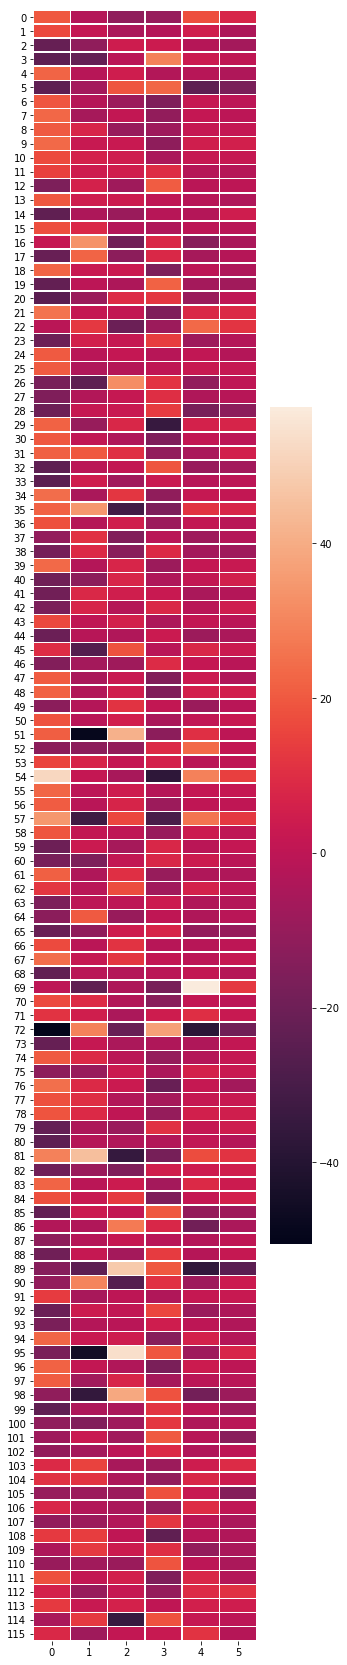

In [37]:
plt.figure(figsize=(5,30))
ax = sns.heatmap(xx, linewidth=0.5)
plt.show()

In [42]:
xx[:100].min(),xx[:100].max(),xx[100:].min(),xx[100:].max()

(-50.534088, 57.602108, -34.606014, 20.237539)

-34.606014